## Keep track of df names
### dog_df, park_df, patio_df, tree_df, bite_df

In [80]:
#import the csv data into a data frame for exploration
import pandas as pd

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Dog_Licensing.csv'
doglic_df = pd.read_csv(path)

In [82]:
doglic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121949 entries, 0 to 121948
Data columns (total 15 columns):
RowNumber                  121949 non-null int64
AnimalName                 121714 non-null object
AnimalGender               121948 non-null object
AnimalBirthMonth           121948 non-null object
BreedName                  121948 non-null object
Borough                    121948 non-null object
ZipCode                    121948 non-null float64
CommunityDistrict          118612 non-null float64
CensusTract2010            118612 non-null float64
NTA                        118612 non-null object
CityCouncilDistrict        118612 non-null float64
CongressionalDistrict      118612 non-null float64
StateSenatorialDistrict    118612 non-null float64
LicenseIssuedDate          121948 non-null object
LicenseExpiredDate         121948 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 14.0+ MB


In [83]:
doglic_df.isna().sum()

RowNumber                     0
AnimalName                  235
AnimalGender                  1
AnimalBirthMonth              1
BreedName                     1
Borough                       1
ZipCode                       1
CommunityDistrict          3337
CensusTract2010            3337
NTA                        3337
CityCouncilDistrict        3337
CongressionalDistrict      3337
StateSenatorialDistrict    3337
LicenseIssuedDate             1
LicenseExpiredDate            1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f36f048>]],
      dtype=object)

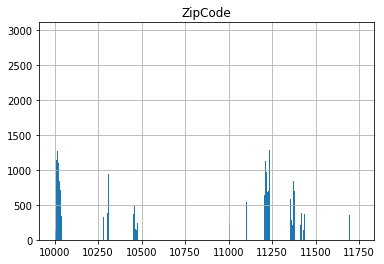

In [35]:

doglic_df.hist(column ='ZipCode',bins=range(10000,11750))

In [84]:
doglic_df['DogCount'] = doglic_df.groupby('ZipCode')['ZipCode'].transform('count')

In [85]:
doglic_df[['ZipCode','DogCount']].sort_values(by='DogCount', ascending=False)

ZipCode  DogCount
107169  10025.0    2965.0
100601  10025.0    2965.0
100638  10025.0    2965.0
100634  10025.0    2965.0
100630  10025.0    2965.0
100627  10025.0    2965.0
100626  10025.0    2965.0
100617  10025.0    2965.0
100614  10025.0    2965.0
100612  10025.0    2965.0
100611  10025.0    2965.0
100609  10025.0    2965.0
100608  10025.0    2965.0
100605  10025.0    2965.0
100602  10025.0    2965.0
107504  10025.0    2965.0
100763  10025.0    2965.0
100593  10025.0    2965.0
100591  10025.0    2965.0
100590  10025.0    2965.0
100588  10025.0    2965.0
100581  10025.0    2965.0
100579  10025.0    2965.0
100578  10025.0    2965.0
100577  10025.0    2965.0
100575  10025.0    2965.0
100574  10025.0    2965.0
100572  10025.0    2965.0
100571  10025.0    2965.0
100570  10025.0    2965.0
...         ...       ...
118988  11509.0       1.0
119691   7624.0       1.0
118782  10262.0       1.0
119692  12083.0       1.0
119696  10606.0       1.0
121291   7093.0       1.0
121860  90403.0       1.0
119255  10533.0       1.0
121864  11704.0       1.0
82806   10068.0       1.0
120849  10274.0       1.0
119604  11791.0       1.0
81254   10111.0       1.0
22938   11323.0       1.0
23748   11609.0       1.0
121225  10362.0       1.0
121568  11569.0       1.0
119614  14228.0       1.0
120397  11553.0       1.0
120520  11548.0       1.0
121561  10968.0       1.0
119855  94109.0       1.0
119440  14420.0       1.0
116085  10450.0       1.0
120889   1003.0       1.0
119230  11783.0       1.0
118766   8527.0       1.0
120552  11716.0       1.0
119529  10583.0       1.0
118612      NaN       NaN

[121949 rows x 2 columns]

In [86]:
doglic_df.rename(columns={'ZipCode': 'DogZip'}, inplace=True)
doglic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121949 entries, 0 to 121948
Data columns (total 16 columns):
RowNumber                  121949 non-null int64
AnimalName                 121714 non-null object
AnimalGender               121948 non-null object
AnimalBirthMonth           121948 non-null object
BreedName                  121948 non-null object
Borough                    121948 non-null object
DogZip                     121948 non-null float64
CommunityDistrict          118612 non-null float64
CensusTract2010            118612 non-null float64
NTA                        118612 non-null object
CityCouncilDistrict        118612 non-null float64
CongressionalDistrict      118612 non-null float64
StateSenatorialDistrict    118612 non-null float64
LicenseIssuedDate          121948 non-null object
LicenseExpiredDate         121948 non-null object
DogCount                   121948 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 14.9+ MB


In [104]:
#create new dog DF
dog_df = doglic_df[['DogZip','DogCount']]
dog_df.drop_duplicates(subset ="DogZip", keep = 'first', inplace = True)
dog_df.sort_values(['DogCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


DogZip  DogCount
73261  10025.0    2965.0
91588  10024.0    2368.0
69639  10023.0    2349.0
64707  10011.0    2227.0
62128  10009.0    2106.0
81453  10128.0    2094.0
33110  11215.0    2068.0
40879  11201.0    2017.0
44253  10314.0    1974.0
48600  10312.0    1800.0

#### Get park data

In [109]:
#create df of

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/ParksProperties.csv'
parks_df = pd.read_csv(path)
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 36 columns):
GISPROPNUM    2011 non-null object
OBJECTID      2011 non-null int64
the_geom      2011 non-null object
OMPPROPID     2011 non-null object
DEPARTMENT    2011 non-null object
PERMITDIST    1965 non-null object
PERMITPARE    1963 non-null object
PARENTID      2007 non-null object
LOCATION      2011 non-null object
COMMUNITYB    2011 non-null object
COUNCILDIS    2010 non-null object
PRECINCT      1978 non-null float64
ZIPCODE       2009 non-null object
BOROUGH       2011 non-null object
ACRES         2011 non-null float64
RETIRED       2011 non-null bool
EAPPLY        1930 non-null object
PIP_RATABL    1961 non-null object
GISOBJID      2011 non-null int64
CLASS         2011 non-null object
COMMISSION    1835 non-null float64
ACQUISITIO    1924 non-null float64
ADDRESS       1078 non-null object
JURISDICTI    2011 non-null object
MAPPED        2006 non-null object
PERMIT        1911

In [110]:
parks_df.isna().sum()

GISPROPNUM      0
OBJECTID        0
the_geom        0
OMPPROPID       0
DEPARTMENT      0
PERMITDIST     46
PERMITPARE     48
PARENTID        4
LOCATION        0
COMMUNITYB      0
COUNCILDIS      1
PRECINCT       33
ZIPCODE         2
BOROUGH         0
ACRES           0
RETIRED         0
EAPPLY         81
PIP_RATABL     50
GISOBJID        0
CLASS           0
COMMISSION    176
ACQUISITIO     87
ADDRESS       933
JURISDICTI      0
MAPPED          5
PERMIT        100
NAME311         1
SIGNNAME        0
SUBCATEGOR    146
TYPECATEGO      0
WATERFRONT      0
URL           106
NYS_ASSEMB      0
NYS_SENATE      0
US_CONGRES      0
GlobalID        0
dtype: int64

In [111]:
parks_df['ParkCount'] = parks_df.groupby('ZIPCODE')['ZIPCODE'].transform('count')
parks_df.rename(columns={'ZIPCODE': 'ParkZip'}, inplace=True)

In [113]:
#create new park DF
park_df = parks_df[['ParkZip','ParkCount']]
park_df.drop_duplicates(subset ="ParkZip", keep = 'first', inplace = True)
park_df.sort_values(['ParkCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ParkZip  ParkCount
17   11207       55.0
3    11211       51.0
57   10009       40.0
75   11201       40.0
33   11212       37.0
26   11233       35.0
89   11206       34.0
55   10457       33.0
31   10452       30.0
29   10035       30.0

#### Get patio data

In [124]:
#create df of patio data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/patios.csv'
patios_df = pd.read_csv(path)
patios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 47 columns):
LICENSE_NBR              1465 non-null object
LIC_STATUS               1551 non-null object
BUSINESS_NAME            1471 non-null object
BUSINESS_NAME2           1051 non-null object
BUILDING                 1551 non-null object
STREET                   1551 non-null object
CITY                     1551 non-null object
STATE                    1551 non-null object
ZIP                      1551 non-null int64
SWC_TYPE                 1551 non-null object
SWC_SQ_FT                1473 non-null float64
SWC_TABLES               1551 non-null int64
SWC_CHAIRS               1551 non-null int64
DOHMH                    1488 non-null object
LATITUDE                 1551 non-null float64
LONGITUDE                1551 non-null float64
COMMUNITY_DISTRICT       1551 non-null int64
CITY_COUNCIL_DISTRICT    1551 non-null int64
CD_URL                   1551 non-null object
APP_ID               

In [125]:
patios_df.isna().sum()

LICENSE_NBR                86
LIC_STATUS                  0
BUSINESS_NAME              80
BUSINESS_NAME2            500
BUILDING                    0
STREET                      0
CITY                        0
STATE                       0
ZIP                         0
SWC_TYPE                    0
SWC_SQ_FT                  78
SWC_TABLES                  0
SWC_CHAIRS                  0
DOHMH                      63
LATITUDE                    0
LONGITUDE                   0
COMMUNITY_DISTRICT          0
CITY_COUNCIL_DISTRICT       0
CD_URL                      0
APP_ID                      0
APP_SWC_TYPE                0
APP_SQ_FT                  79
APP_TABLES                  0
APP_CHAIRS                  0
APP_STATUS                  0
APP_STATUS_DATE             0
EXPIRATION_DATE           163
APP_TOO_DATE             1044
SUBMIT_DATE                 0
INTAKE                     11
INTAKE_DD                  12
DPQA                        0
SEND_PACKAGE_DD           513
CP        

In [126]:
patios_df['PatioCount'] = patios_df.groupby('ZIP')['ZIP'].transform('count')
patios_df.rename(columns={'ZIP': 'PatioZip'}, inplace=True)

In [127]:
#create new park DF
patio_df = patios_df[['PatioZip','PatioCount']]
patio_df.drop_duplicates(subset ="PatioZip", keep = 'first', inplace = True)
patio_df.sort_values(['PatioCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PatioZip  PatioCount
5      10014         105
8      10003          83
66     10024          82
12     10013          80
26     10012          72
17     10025          55
6      10011          52
0      10019          48
4      10023          47
57     11211          43

### Get tree data

In [130]:
#create df of patio data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Tree_data.csv'
trees_df = pd.read_csv(path)
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
tree_id             683788 non-null int64
block_id            683788 non-null int64
created_at          683788 non-null object
tree_dbh            683788 non-null int64
stump_diam          683788 non-null int64
curb_loc            683788 non-null object
status              683788 non-null object
health              652172 non-null object
spc_latin           652169 non-null object
spc_common          652169 non-null object
steward             652173 non-null object
guards              652172 non-null object
sidewalk            652172 non-null object
user_type           683788 non-null object
problems            652124 non-null object
root_stone          683788 non-null object
root_grate          683788 non-null object
root_other          683788 non-null object
trunk_wire          683788 non-null object
trnk_light          683788 non-null object
trnk_other          683788 non-nu

In [131]:
trees_df.isna().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [133]:
trees_df['TreeCount'] = trees_df.groupby('postcode')['postcode'].transform('count')
trees_df.rename(columns={'postcode': 'TreeZip'}, inplace=True)

In [134]:
#create new park DF
tree_df = trees_df[['TreeZip','TreeCount']]
tree_df.drop_duplicates(subset ="TreeZip", keep = 'first', inplace = True)
tree_df.sort_values(['TreeCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TreeZip  TreeCount
57      10312      22186
50      10314      16905
23      10306      13030
557     10309      12650
211     11234      11253
29      11385      10937
1       11357       9449
385     11207       8634
725     11434       8274
1380    11208       8245

### Dog bite data

In [135]:
#create df of dog bite  data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Bite_data.csv'
bite_df = pd.read_csv(path)
bite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 9 columns):
UniqueID      10280 non-null int64
DateOfBite    10280 non-null object
Species       10280 non-null object
Breed         8692 non-null object
Age           5534 non-null object
Gender        10280 non-null object
SpayNeuter    10280 non-null bool
Borough       10280 non-null object
ZipCode       7613 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 652.6+ KB


In [136]:
bite_df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed         1588
Age           4746
Gender           0
SpayNeuter       0
Borough          0
ZipCode       2667
dtype: int64

In [139]:
bite_df.dropna(subset=['ZipCode'],inplace=True)
bite_df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed          793
Age           2868
Gender           0
SpayNeuter       0
Borough          0
ZipCode          0
dtype: int64

In [140]:
bite_df['BiteCount'] = bite_df.groupby('ZipCode')['ZipCode'].transform('count')
bite_df.rename(columns={'ZipCode': 'BiteZip'}, inplace=True)

In [141]:
#create new park DF
bite_df = bite_df[['BiteZip','BiteCount']]
bite_df.drop_duplicates(subset ="BiteZip", keep = 'first', inplace = True)
bite_df.sort_values(['BiteCount'], ascending=False).head(10)

BiteZip  BiteCount
2543   10029        166
6851   11368        116
20     11208        116
9380   10314        110
3      11221         95
2315   10456         91
9360   10312         89
4      11207         85
6      11220         84
2294   10458         84

### Look at yelp data for dog services

In [142]:
#create df of patio data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/yelp_business.csv'
yelp_df = pd.read_csv(path)
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42153 entries, 0 to 42152
Columns: 105 entries, business_id to attributes.Ambience.upscale
dtypes: bool(1), float64(4), int64(1), object(99)
memory usage: 33.5+ MB


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,5,8,15,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Next steps - igonore yelp for now, create a combined DF of all counts, create a score, rank zips